In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [4]:
data_frame = pd.read_csv('Entrenamieto_ECI_2020.csv')
data_frame.Account_Created_Date = pd.to_datetime(data_frame.Account_Created_Date)
data_frame.Actual_Delivery_Date = pd.to_datetime(data_frame.Actual_Delivery_Date)
data_frame.Opportunity_Created_Date = pd.to_datetime(data_frame.Opportunity_Created_Date)
data_frame.Quote_Expiry_Date = pd.to_datetime(data_frame.Quote_Expiry_Date)
data_frame.Last_Modified_Date = pd.to_datetime(data_frame.Last_Modified_Date)
data_frame.Planned_Delivery_Start_Date = pd.to_datetime(data_frame.Planned_Delivery_Start_Date)
data_frame

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,2015-10-20,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [5]:
oportunidades_cerradas = data_frame[(((data_frame.Stage == 'Closed Lost') | (data_frame.Stage == 'Closed Won') ) & (data_frame.Region == 'APAC') ) ]

In [6]:
oportunidades_ganadas_APAC = data_frame[(data_frame.Stage == 'Closed Won') & (data_frame.Region == 'APAC')]
oportunidades_ganadas_APAC

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2015-10-13,...,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.0,Closed Won,Prod_Category_A_None
77,4937,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-12-14,...,Q1,2016,NaT,0,USD,3920.0,USD,3920.0,Closed Won,Prod_Category_A_None
133,21588,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2014-09-09,...,Q1,2016,NaT,0,USD,109760.0,USD,109760.0,Closed Won,Prod_Category_A_None
260,18479,APAC,Singapore,0,0,0,0,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,0,USD,22950.0,USD,22950.0,Closed Won,Prod_Category_A_None
279,18475,APAC,Singapore,1,1,0,0,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,0,USD,3825.0,USD,3825.0,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,19008,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,1,USD,632905.0,USD,632905.0,Closed Won,Prod_Category_A_None
16678,28548,APAC,Indonesia,1,1,1,1,0,Bureaucratic_Code_4,2015-10-16,...,Q2,2016,NaT,0,USD,17242.5,USD,17242.5,Closed Won,Prod_Category_A_None
16697,18891,APAC,India,0,0,0,0,0,Bureaucratic_Code_4,2014-01-28,...,Q3,2016,NaT,0,USD,45500.0,USD,45500.0,Closed Won,Prod_Category_A_None
16835,28338,APAC,India,1,0,0,0,0,Bureaucratic_Code_5,2015-09-09,...,Q1,2016,NaT,0,USD,70200.0,USD,70200.0,Closed Won,Prod_Category_A_None


In [7]:
oportunidades_perdidas_APAC = data_frame[(data_frame.Stage == 'Closed Lost') & (data_frame.Region == 'APAC')]
oportunidades_perdidas_APAC

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
24,4915,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-12-09,...,Q1,2016,NaT,0,USD,221650.0,USD,221650.0,Closed Lost,Prod_Category_A_None
136,18985,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,0,USD,17550.0,USD,17550.0,Closed Lost,Prod_Category_A_None
137,23583,APAC,India,1,0,1,0,0,Bureaucratic_Code_5,2014-12-18,...,Q2,2016,NaT,13,USD,6695835.3,USD,13438632.9,Closed Lost,Prod_Category_A_None
138,23584,APAC,India,1,0,1,0,0,Bureaucratic_Code_5,2014-12-18,...,Q2,2016,NaT,13,USD,6742797.6,USD,13438632.9,Closed Lost,Prod_Category_A_None
280,8220,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2016-01-06,...,Q1,2016,NaT,0,USD,221650.0,USD,221650.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16822,28752,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-11-19,...,Q1,2016,NaT,2,USD,1100962.5,USD,2216362.5,Closed Lost,Prod_Category_A_None
16823,28755,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-11-19,...,Q1,2016,NaT,1,USD,561275.0,USD,561275.0,Closed Lost,Prod_Category_A_None
16858,10309,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2016-02-01,...,Q2,2017,NaT,9,USD,4954950.0,USD,4055000.0,Closed Lost,Prod_Category_A_None
16859,10315,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2016-02-01,...,Q2,2017,NaT,0,USD,4055000.0,USD,4055000.0,Closed Lost,Prod_Category_A_None


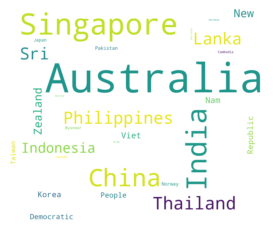

In [14]:
text = " ".join(country for country in oportunidades_ganadas_APAC.Billing_Country)
paises_ganados = oportunidades_ganadas_APAC.Billing_Country.astype(str)

wordcloud = WordCloud(collocations=False,background_color="white",
                          width=1200, height=1000).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [5]:
ganadas_por_pais_APAC_df = oportunidades_ganadas_APAC.Billing_Country.value_counts().to_frame()
ganadas_por_pais_APAC_df.columns=['Oportunidades ganadas por pais']
ganadas_por_pais_APAC_df

,Oportunidades ganadas por pais
Australia,695
Singapore,314
India,284
China,203
Thailand,90
Philippines,83
Sri Lanka,79
Indonesia,53
New Zealand,32
Viet Nam,16


Text(0.5, 0, 'Paises')

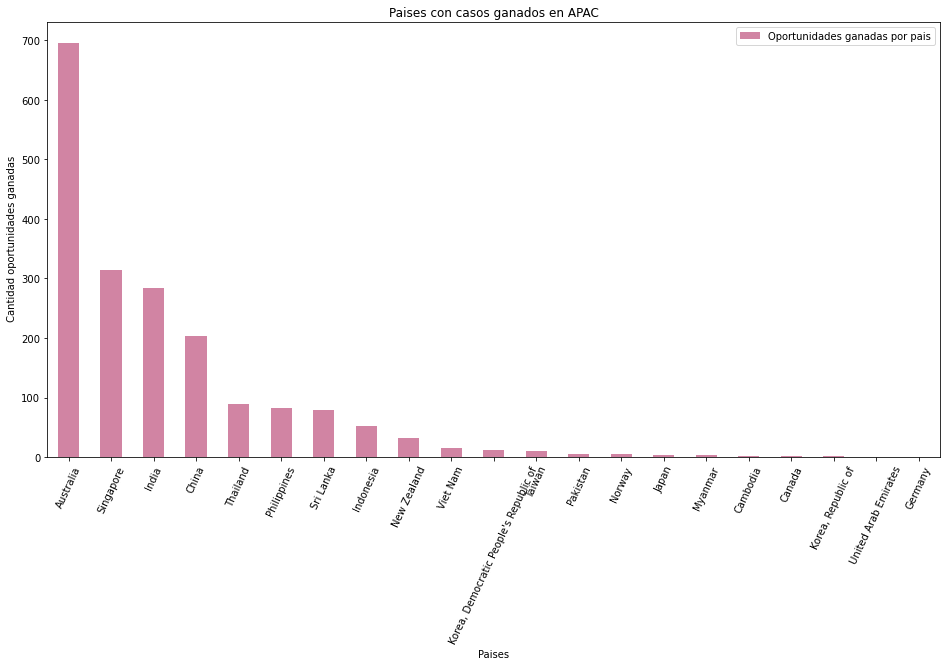

In [7]:
ganadas_por_pais_APAC_df.plot(kind= 'bar',figsize =(16,8), rot =65, title = 'Paises con casos ganados en APAC', color = (0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel(' Cantidad oportunidades ganadas');
ax.set_xlabel('Paises')

In [9]:
perdidas_por_pais_APAC_df = oportunidades_perdidas_APAC.Billing_Country.value_counts().to_frame()
perdidas_por_pais_APAC_df.columns=['Cantidad de oportunidades perdidas por pais']
perdidas_por_pais_APAC_df

,Cantidad de oportunidades perdidas por pais
Australia,470
India,384
Singapore,104
Thailand,103
Indonesia,86
Philippines,55
Sri Lanka,26
Taiwan,24
Viet Nam,21
China,18


Text(0.5, 0, 'Paises')

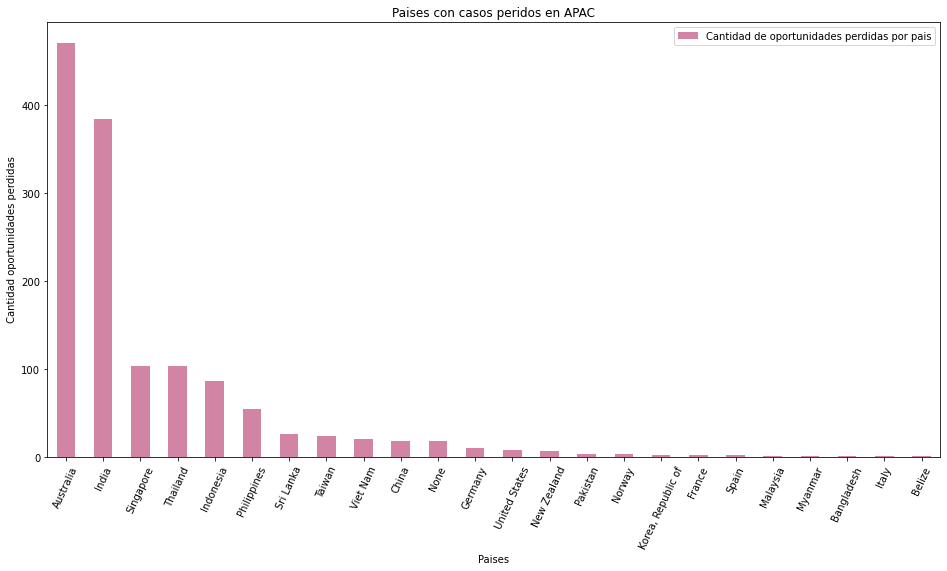

In [10]:
perdidas_por_pais_APAC_df.plot(kind= 'bar',figsize =(16,8), rot =65, title = 'Paises con casos peridos en APAC', color = (0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel(' Cantidad oportunidades perdidas');
ax.set_xlabel('Paises')

In [40]:
estado_oportunidades_segun_anio_creacion = oportunidades_cerradas['Stage'].to_frame()
estado_oportunidades_segun_anio_creacion['Anio_creado']= oportunidades_cerradas.Opportunity_Created_Date.dt.year
estado_oportunidades_segun_anio_creacion

,Stage,Anio_creado
23,Closed Won,2015
24,Closed Lost,2015
77,Closed Won,2015
133,Closed Won,2015
136,Closed Lost,2015
...,...,...
16835,Closed Won,2015
16858,Closed Lost,2015
16859,Closed Lost,2015
16860,Closed Won,2015
